# Webscraping utilizando a Beatiful Soup 

1. Coletar os seguintes dados do site: https://books.toscrape.com/index.html
 - Cátalogo: 
  -- Classics 
  -- Science Fiction 
  -- Business 
  
 - Coletar os seguintes dados de cada livro 
  -- Nome do Livro 
  -- Preço em Libras 
  -- Disponível em estoque 
  
 

2. Problema de Negócio 

O CEO da livraria ROCKET BOOKS precia saber o que seu concorrente está fazendo. No caso, a Rocket Books vende 3 gêneros de livros Classics, Science Fiction e Business. O CEO gostaria de um dataseet com o que o concorrente está vendendo sobre esses 3 gêneros. Mais uma lista com o preço para um comparativo, e se está ou não disponível no estoque. 

3. Entregável
 - Saída: Simulação da Tabela final e gráfico final 
 - Processo: Sequência de passos organizada pela lógica e execução 
 - Entrada: Link para as fontes de dados https://books.toscrape.com/index.html
 
* Um csv com o pedido do CEO

4. Resolva essas duas teses do CEO
  * Os livros de gênero de negócios são os que tem a melhor avaliação? 
  * Os livros com maior preço médio são os que tem a melhor avaliação?

## 0.0 Import

In [19]:
import requests
import pandas as pd
from datetime import datetime
from bs4 import BeautifulSoup
import numpy as np
import math
import seaborn as sns


### 0.1 Fuctions

In [20]:
def arrumar_euro(lista): 
    for p in range(len(lista)):
        lista[p] = float(lista[p].replace("Â£", "").strip())
    return lista

### 1.0 Reading Site

#### 1.1 GENRE CLASSIC

In [21]:
url_classic = 'https://books.toscrape.com/catalogue/category/books/classics_6/index.html'

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) , AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'}
page = requests.get( url_classic, headers=headers )
soup = BeautifulSoup( page.text, "html.parser")

classic = soup.find( "ol" , class_="row")

#=============================price=============================
classic_price = classic.find_all("p", class_="price_color")
price_classic = [p.get_text() for p in classic_price]

#ajuste de variáveis
price_classic = arrumar_euro(price_classic)


#==========================name==============================
classic_name = classic.find_all("h3")
name_classic = [p.get_text() for p in classic_name]


#=========================rating score=========================
products = soup.find("div", class_="col-sm-8 col-md-9")
products_list = products.find_all("p", class_="star-rating")

#Costumer Avaliable
ca = [p.get("class") for p in products_list]
drop = lambda x: x.remove("star-rating")
list(map(drop, ca))


#===================disponível em estoque====================
classic_est = classic.find_all("p", class_="instock availability")
classic_est = [ list(filter(None, p.get_text().split("\n"))) for p in classic_est]

#new variable 
est_classic = []
for p in range(len(classic_est)):
               est_classic.append(classic_est[p][1].strip())

        

data_classic = pd.DataFrame([name_classic, est_classic, price_classic, ca]).T
data_classic.columns = ["name", "storage", "price [£]", "rating"]
        
valor1 = ""
valor = ""

for p in range(len(data_classic)): 
    valor = data_classic["rating"][p]
    valor1= valor[0] 
    data_classic["rating"][p] = valor1  
    
data_classic["genre"] = "Classic"

### 1.2 Science Ficition

In [22]:
url_classic = 'https://books.toscrape.com/catalogue/category/books/science-fiction_16/index.html'

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) , AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'}
page = requests.get( url_classic, headers=headers )
soup = BeautifulSoup( page.text, "html.parser")

classic = soup.find( "ol" , class_="row")

#=============================price=============================
classic_price = classic.find_all("p", class_="price_color")
price_classic = [p.get_text() for p in classic_price]

#ajuste de variáveis
price_classic = arrumar_euro(price_classic)


#==========================name==============================
classic_name = classic.find_all("h3")
name_classic = [p.get_text() for p in classic_name]


#=========================rating score=========================
products = soup.find("div", class_="col-sm-8 col-md-9")
products_list = products.find_all("p", class_="star-rating")

#Costumer Avaliable
ca = [p.get("class") for p in products_list]
drop = lambda x: x.remove("star-rating")
list(map(drop, ca))


#===================disponível em estoque====================
classic_est = classic.find_all("p", class_="instock availability")
classic_est = [ list(filter(None, p.get_text().split("\n"))) for p in classic_est]

#new variable 
est_classic = []
for p in range(len(classic_est)):
               est_classic.append(classic_est[p][1].strip())




data_science = pd.DataFrame([name_classic, est_classic, price_classic, ca]).T
data_science.columns = ["name", "storage", "price [£]", "rating"]
        
valor1 = ""
valor = ""

for p in range(len(data_science)): 
    valor = data_science["rating"][p]
    valor1= valor[0] 
    data_science["rating"][p] = valor1  
    
data_science["genre"] = "Science Fiction"

### 1.3 Genre Business

In [23]:
url_classic = 'https://books.toscrape.com/catalogue/category/books/business_35/index.html'

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) , AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'}
page = requests.get( url_classic, headers=headers )
soup = BeautifulSoup( page.text, "html.parser")

classic = soup.find( "ol" , class_="row")

#=============================price=============================
classic_price = classic.find_all("p", class_="price_color")
price_classic = [p.get_text() for p in classic_price]

#ajuste de variáveis
price_classic = arrumar_euro(price_classic)


#==========================name==============================
classic_name = classic.find_all("h3")
name_classic = [p.get_text() for p in classic_name]


#=========================rating score=========================
products = soup.find("div", class_="col-sm-8 col-md-9")
products_list = products.find_all("p", class_="star-rating")

#Costumer Avaliable
ca = [p.get("class") for p in products_list]
drop = lambda x: x.remove("star-rating")
list(map(drop, ca))


#===================disponível em estoque====================
classic_est = classic.find_all("p", class_="instock availability")
classic_est = [ list(filter(None, p.get_text().split("\n"))) for p in classic_est]

#new variable 
est_classic = []
for p in range(len(classic_est)):
               est_classic.append(classic_est[p][1].strip())


data_bus = pd.DataFrame([name_classic, est_classic, price_classic, ca]).T
data_bus.columns = ["name", "storage", "price [£]", "rating"]
        
valor1 = ""
valor = ""

for p in range(len(data_bus)): 
    valor = data_bus["rating"][p]
    valor1= valor[0] 
    data_bus["rating"][p] = valor1    
    

data_bus["genre"] = "Business"

### 1.4 All Dataframes

In [24]:
data_total = pd.merge(data_classic,data_bus, how = 'outer')
data_total = pd.merge(data_total, data_science, how = 'outer')

In [25]:
data_total["rating_number"] = data_total["rating"].apply(lambda x: 1 if x == "One" else 
                                                   2 if x== "Two" else 
                                                  3 if x == "Three" else 
                                                  4 if x == "Four" else 
                                                  5)

In [37]:
data_total.dtypes

name             object
storage          object
price [£]        object
rating           object
genre            object
rating_number     int64
dtype: object

In [26]:
data_total

,name,storage,price [£],rating,genre,rating_number
0,The Secret Garden,In stock,15.08,Four,Classic,4
1,The Metamorphosis,In stock,28.58,One,Classic,1
2,The Pilgrim's Progress,In stock,50.26,Two,Classic,2
3,The Hound of the ...,In stock,14.82,Two,Classic,2
4,Little Women (Little Women ...,In stock,28.07,Four,Classic,4
5,Gone with the Wind,In stock,32.49,Three,Classic,3
6,Candide,In stock,58.63,Three,Classic,3
7,Animal Farm,In stock,57.22,Three,Classic,3
8,Wuthering Heights,In stock,17.73,Three,Classic,3
9,The Picture of Dorian ...,In stock,29.7,Two,Classic,2


## 2.0 Plots | Data Exploratory

Temos mais Livros avalidos do gênero Clássico

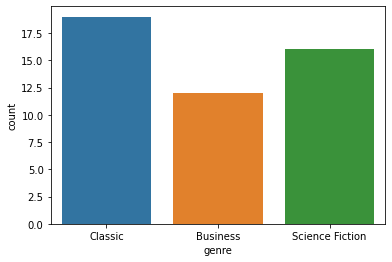

In [27]:
sns.countplot(x='genre',data=data_total);

Alguns livros que costumam desnortear no boxplot. Chegam mais acima do primeiro quartil

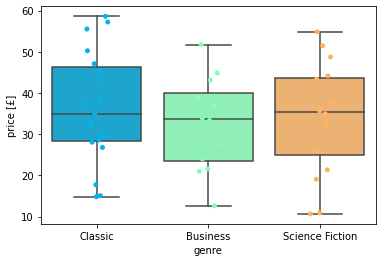

In [28]:
sns.boxplot(x="genre", y="price [£]", data=data_total,palette='rainbow');
sns.stripplot(x="genre", y="price [£]", data=data_total,palette='rainbow');

Maior preço médio é dos livros clássicos

In [29]:
df = data_total.copy()
teste = df[['genre', 'price [£]']].groupby('genre').mean().reset_index()

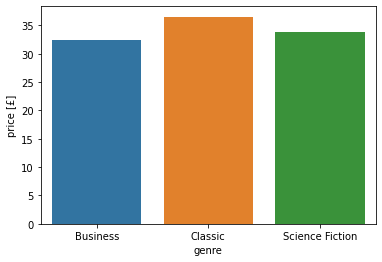

In [30]:
sns.barplot(x="genre", y="price [£]",data=teste);

#### Livros clássicos 

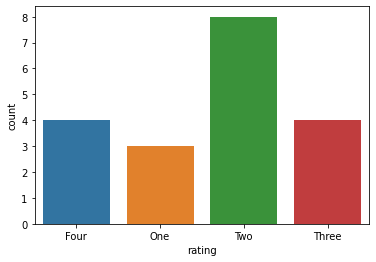

In [31]:
sns.countplot(x='rating',data=data_classic);

#### Livros Científicos 


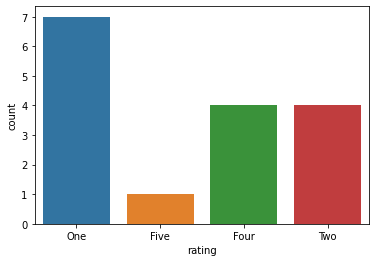

In [32]:
sns.countplot(x='rating',data=data_science);

#### Livros de Negócios 

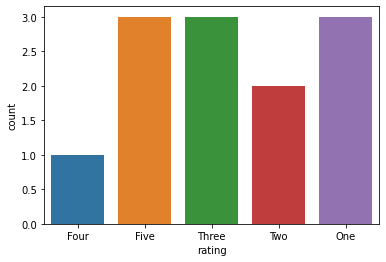

In [33]:
sns.countplot(x='rating',data=data_bus);

### 3.0 Conclusão

H1. **FALSA** O gênero com maior preço médio tem melhores avaliações. 

Como vimos no gráfico o maior preço médio é do gênero Clássico. Porém a melhor avaliação de todos os gênero está para o "negócios". Com isso, não necessariamente o gênero com maior preço médio é o que tem melhores avaliações

H2. **VERDADEIRO**  O Gênero de Negócios tem o melhor rating de todos os gêneros 

No gráfico acima conseguimos observar que o gênero "Negócios" (Business) é o que tem melhores avaliações, tendo notas 5 estrelas e uma grande maioria de notas de Três estrelas